In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array


In [4]:
import os

base_path = r"C:\Users\Admin\OneDrive\Desktop\Greenclassify\Vegetable Images"

train_path = os.path.join(base_path, "train")
validation_path = os.path.join(base_path, "validation")
test_path = os.path.join(base_path, "test")

print(os.path.exists(train_path))
print(os.path.exists(validation_path))
print(os.path.exists(test_path))


True
True
True


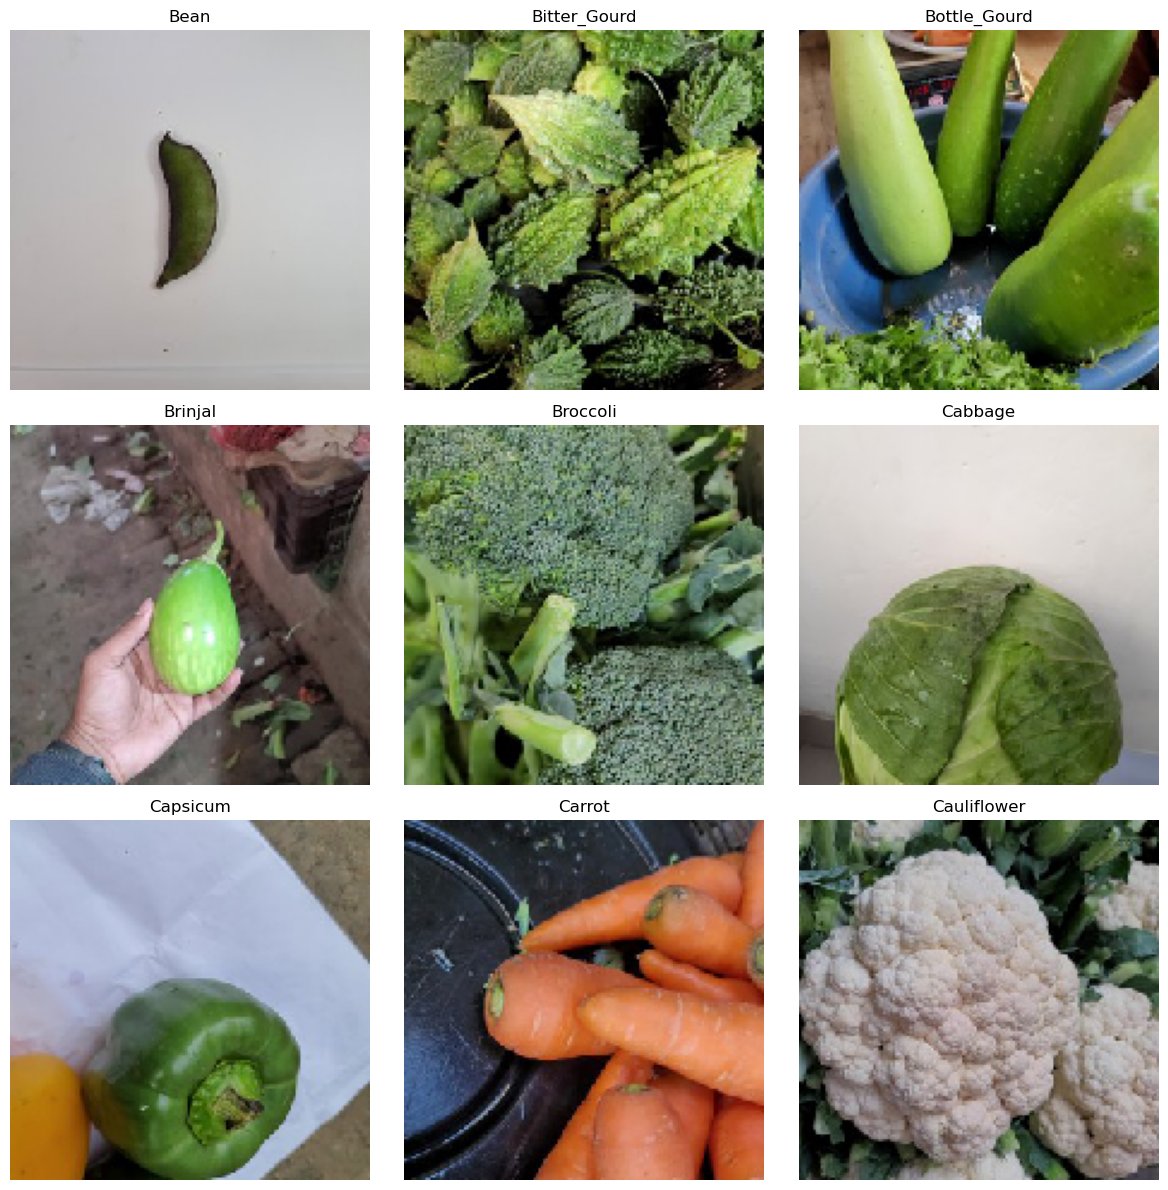

In [5]:
# Get class names safely
image_categories = sorted(os.listdir(train_path))

def plot_images():
    plt.figure(figsize=(12, 12))

    for i, cat in enumerate(image_categories[:9]):
        image_path = os.path.join(train_path, cat)

        # Skip if folder is empty
        if len(os.listdir(image_path)) == 0:
            continue

        first_image = os.listdir(image_path)[0]
        first_image_path = os.path.join(image_path, first_image)

        img = load_img(first_image_path, target_size=(150,150))
        img_arr = img_to_array(img) / 255.0

        plt.subplot(3, 3, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call function
plot_images()


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [8]:
class_labels = train_generator.class_indices
print("Class Labels Mapping:")
print(class_labels)

Class Labels Mapping:
{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dense(len(image_categories), activation='softmax'))

model.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,252,815 (42.93 MB)

 Trainable params: 11,252,815 (42.93 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,                 # 5 epochs improvement नसेल तर थांबव
    restore_best_weights=True    # best weights ठेव
)
model.compile(
    optimizer='adam',
 
)

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 805s 2s/step - accuracy: 0.4864 - loss: 1.5166 - val_accuracy: 0.7154 - val_loss: 0.8571
Epoch 2/50
  1/468 ━━━━━━━━━━━━━━━━━━━━ 3:17 422ms/step - accuracy: 0.6875 - loss: 0.9658

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6875 - loss: 0.9658 - val_accuracy: 0.7184 - val_loss: 0.8469
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 755s 2s/step - accuracy: 0.7147 - loss: 0.8508 - val_accuracy: 0.8182 - val_loss: 0.5849
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.7188 - loss: 0.7626 - val_accuracy: 0.8212 - val_loss: 0.5809
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 689s 1s/step - accuracy: 0.7955 - loss: 0.6308 - val_accuracy: 0.8955 - val_loss: 0.3744
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9375 - loss: 0.2448 - val_accuracy: 0.8898 - val_loss: 0.3937
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.8296 - loss: 0.5122 - val_accuracy: 0.9200 - val_loss: 0.2809
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 65s 137ms/step - accuracy: 0.7188 - loss: 0.5855 - val_accuracy: 0.9126 - val_loss: 0.2884
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 694s 1s/step - accuracy: 0.8535 - loss: 0.4488 - val_accuracy: 

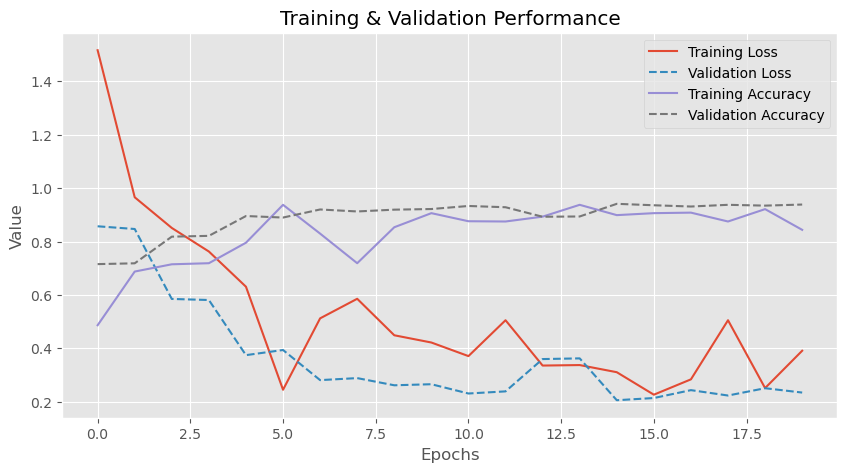

In [13]:
history = model.fit(
    train_generator,
    epochs=50,                         # 100 नाही, 50 enough
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32,
    callbacks=[early_stopping],        # IMPORTANT
    verbose=1
)



h = history.history

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))

plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], linestyle='--', label='Validation Loss')

plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], linestyle='--', label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.title("Training & Validation Performance")

plt.show()


In [14]:
# ==============================
# ✅ Evaluate Model on Test Data
# ==============================

test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print("\n📊 Test Loss:", test_loss)
print("🎯 Test Accuracy:", test_accuracy * 100, "%")


print("Final Training Accuracy:", history.history['accuracy'][-1] * 100, "%")
print("Final Validation Accuracy:", history.history['val_accuracy'][-1] * 100, "%")
print("Best Validation Accuracy:",
      max(history.history['val_accuracy']) * 100, "%")



94/94 ━━━━━━━━━━━━━━━━━━━━ 64s 677ms/step - accuracy: 0.9463 - loss: 0.1819

📊 Test Loss: 0.18188653886318207
🎯 Test Accuracy: 94.63333487510681 %
Final Training Accuracy: 84.375 %
Final Validation Accuracy: 93.85080933570862 %
Best Validation Accuracy: 94.11962628364563 %


In [15]:
# ==============================
# 💾 Save Model
# ==============================

model.save("vegetable_classifier_model.h5")

print("✅ Model saved successfully!")


✅ Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
Predicted Class: Tomato
Confidence Score: 100.0 %


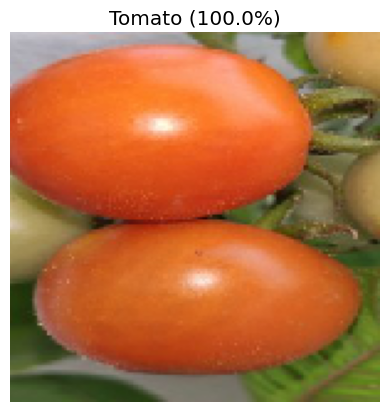

In [18]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# ====== Give Image Path Here ======
image_path = r"C:\Users\Admin\OneDrive\Desktop\Greenclassify\Vegetable Images\test\Tomato\1019.jpg"
# change filename according to your test image

# Load image
img = load_img(image_path, target_size=(150,150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Get class labels
class_names = list(train_generator.class_indices.keys())

# Get predicted class index
predicted_index = np.argmax(prediction)

predicted_class = class_names[predicted_index]
confidence = prediction[0][predicted_index] * 100

print("Predicted Class:", predicted_class)
print("Confidence Score:", round(confidence, 2), "%")

# Show image
plt.imshow(img)
plt.title(f"{predicted_class} ({round(confidence,2)}%)")
plt.axis("off")
plt.show()
